In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [4]:
list_of_files = [r"A:\FCUL\Kinetikos\PAMAP_TSF\PAMAP2_Dataset\Protocol\subject101.dat",
                 r"A:\FCUL\Kinetikos\PAMAP_TSF\PAMAP2_Dataset\Protocol\subject102.dat",
                 r"A:\FCUL\Kinetikos\PAMAP_TSF\PAMAP2_Dataset\Protocol\subject103.dat",
                 r"A:\FCUL\Kinetikos\PAMAP_TSF\PAMAP2_Dataset\Protocol\subject104.dat",
                 r"A:\FCUL\Kinetikos\PAMAP_TSF\PAMAP2_Dataset\Protocol\subject105.dat",
                 r"A:\FCUL\Kinetikos\PAMAP_TSF\PAMAP2_Dataset\Protocol\subject106.dat",
                 r"A:\FCUL\Kinetikos\PAMAP_TSF\PAMAP2_Dataset\Protocol\subject107.dat",
                 r"A:\FCUL\Kinetikos\PAMAP_TSF\PAMAP2_Dataset\Protocol\subject108.dat",
                 r"A:\FCUL\Kinetikos\PAMAP_TSF\PAMAP2_Dataset\Protocol\subject109.dat"]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature',
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3',
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
           'handGyro1', 'handGyro2', 'handGyro3',
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature',
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3',
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
           'chestGyro1', 'chestGyro2', 'chestGyro3',
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature',
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3',
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

len(columns)

54

In [22]:
dataCollection = pd.DataFrame()
for file in list_of_files:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    dataCollection = dataCollection.append(procData, ignore_index=True)

dataCollection.reset_index(drop=True, inplace=True)
dataCollection.head()

C:\Users\guisi\AppData\Local\Temp\ipykernel_9472\2181001863.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection = dataCollection.append(procData, ignore_index=True)
C:\Users\guisi\AppData\Local\Temp\ipykernel_9472\2181001863.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection = dataCollection.append(procData, ignore_index=True)
C:\Users\guisi\AppData\Local\Temp\ipykernel_9472\2181001863.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection = dataCollection.append(procData, ignore_index=True)
C:\Users\guisi\AppData\Local\Temp\ipykernel_9472\2181001863.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


In [23]:
def dataCleaning(dataCollection):
        dataCollection = dataCollection.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                             'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                             'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                             axis = 1)  # removal of orientation columns according to the readme
        dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index) #removal of any row of activity 0 as it is transient activity which it is not used
        dataCollection = dataCollection.apply(pd.to_numeric, errors = 'coerce') #removal of non numeric data in cells
        dataCollection = dataCollection.interpolate() #removal of any remaining NaN value cells by constructing new data points in known set of data points

        return dataCollection

In [24]:
dataCol = dataCleaning(dataCollection)
dataCol.reset_index(drop = True, inplace = True)
dataCol.head(10)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,...,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,...,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1
9,37.75,1,100.0,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,...,9.63189,-1.70699,0.326105,0.029874,-0.010763,0.005133,-60.7680,-37.4206,-58.8735,1


In [25]:
for i in range(0,4):
    dataCol["heartrate"].iloc[i]=100

C:\Users\guisi\AppData\Local\Temp\ipykernel_9472\1843619689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCol["heartrate"].iloc[i]=100


In [26]:
# selecionar 30% dos dados para conseguir correr em tempo apreciavel
dataCol= dataCol.sample(n= 10000)

In [27]:
feature_cols= dataCol.copy().drop(['activityID', 'timestamp', 'subject_id'], axis= 1)
target_col= dataCol.copy()['activityID']
del dataCol, dataCollection

In [28]:
feature_cols.head()

,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
359256,104.0,34.4375,-5.427060,8.618090,-1.37884,-6.149470,9.001470,-0.291474,0.146995,0.124817,...,-1.617540,9.51959,0.226715,-1.526020,0.188469,0.299383,-0.443703,-33.18020,5.19008,-8.76174
693834,73.0,32.6250,5.013150,0.352365,8.38878,5.153620,0.244265,8.504800,0.015270,0.024899,...,1.837630,1.88618,-9.450350,2.268920,-0.000846,0.013930,0.007647,-21.03440,16.17470,-14.00230
1256009,90.0,33.6875,-9.802080,0.493208,2.66269,-9.734680,0.422283,3.189060,-0.035214,-0.185006,...,-0.498579,9.61622,0.531127,0.016284,0.190594,-0.102342,-0.251318,-41.49310,10.14440,39.82890
781484,113.0,33.5625,-1.096780,3.053710,8.09571,-0.807461,2.643500,8.762350,-0.606752,-0.485524,...,-2.193710,9.68371,0.014686,-1.783500,-0.199208,0.054780,0.187112,-36.64680,1.16480,45.52960
1721524,80.0,34.4375,-0.692753,-8.211490,4.63742,-0.462918,-8.190870,4.995440,0.018980,-0.060696,...,-2.574060,9.56192,-0.590765,-2.129020,0.036726,-0.010855,0.018542,-3.00709,19.36270,18.53690


In [29]:
target_col.head()

359256     16
693834      1
1256009     3
781484     17
1721524     3
Name: activityID, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(feature_cols, target_col, test_size=0.2, random_state=1)
del feature_cols, target_col

In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

#apply scaling to all columns except subject and activity
scaler = RobustScaler()
x_train_s = x_train.copy()
x_test_s = x_test.copy()

x_train_s = scaler.fit_transform(x_train_s)
x_test_s = scaler.fit_transform(x_test_s)

del x_train, x_test

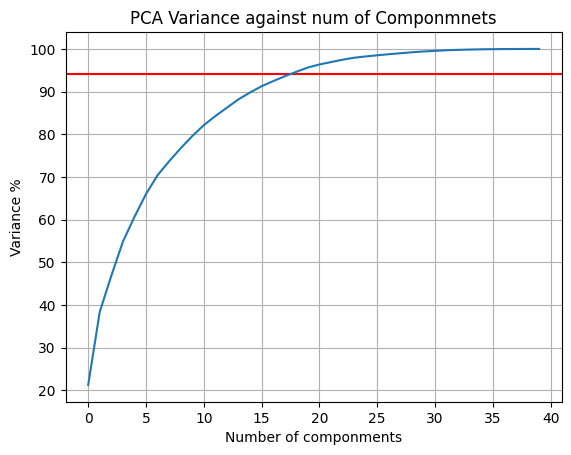

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_s)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid()

In [33]:
pca = PCA(n_components=17)
x_train_s=pca.fit_transform(x_train_s)
x_test_s=pca.fit_transform(x_test_s)

In [95]:
y_train

1269086    17
1039245    16
543518      2
1081521     4
1695702     1
           ..
47846       2
219818      5
1813146    13
736691      3
412450      4
Name: activityID, Length: 8000, dtype: int64

In [86]:
tf.keras.backend.clear_session()

In [87]:
from tensorflow import keras


In [88]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(12)
])

In [89]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

In [90]:
model.fit(x_train_s, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 4ms/step - loss: nan - sparse_categorical_accuracy: 5.0000e-04
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00
Epoch 5/100
  1/250 [..............................] - ETA: 0s - loss: nan - sparse_categorical_accuracy: 0.0000e+00

KeyboardInterrupt: 

In [39]:
test_loss, test_acc = model.evaluate(x_test_s,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

63/63 - 1s - loss: nan - accuracy: 0.0000e+00 - 526ms/epoch - 8ms/step

Test accuracy: 0.0
